# **Fashion Mnist Dataset**

In [6]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [8]:
# Load the Dataset
(X_train , y_train), (X_test , y_test) = keras.datasets.fashion_mnist.load_data()


In [9]:
# Let's check the shape of dataset
print(f"We have {len(X_train)} images in the Training Dataset and {len(X_test)} in the Testing Dataset.")

We have 60000 images in the Training Dataset and 10000 in the Testing Dataset.


In [10]:
print(f"Shape of X_train:", X_train.shape)
print(f"Shape of X_test:", X_test.shape)
print(f"Shape of y_train:", y_train.shape)
print(f"Shape of y_test:", y_test.shape)

Shape of X_train: (60000, 28, 28)
Shape of X_test: (10000, 28, 28)
Shape of y_train: (60000,)
Shape of y_test: (10000,)


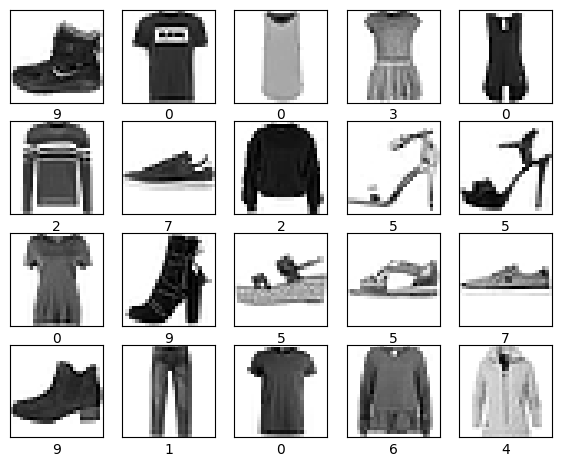

In [11]:
# Display some sample images
plt.figure(figsize=(7,7))
for i in range(20):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

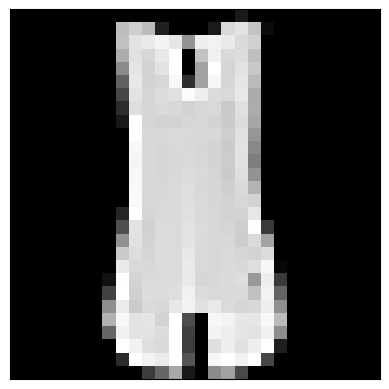

Pixel values:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  26   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0 189 206 187  32   0   0   0  26 217 226 196  11   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0 192 227 234 243 230 147 239 242 234 218 209   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0 173 225 215 233 254   0 194 240 217 221 190   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0 139 229 212 226 255   0 162 255 213 226 200   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0  98 232 211 215 249  46 162 246 214 230 186   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0  70 228 213 220 224 252 239 219 217 231 171   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0  45 222 214 218 216 210 215 217 202 224 172   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0  24 254 214 210 211 214 215 212 203 221 167   0   

In [12]:
# Display the fifth image in the dataset as a data matrix
plt.imshow(X_train[4], cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

# Display the values of each pixel in the image
print("Pixel values:")
for row in X_train[4]:
    for pixel in row:
        print("{:3}".format(pixel), end=" ")
    print()

In [13]:
# Let's Normalize the data.
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print("\nPixel values after normalization:")
for row in X_train[0]:
    for pixel in row:
        print("{:0.3f}".format(pixel), end=" ")
    print()


Pixel values after normalization:
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.004 0.000 0.000 0.051 0.286 0.000 0.000 0.004 0.016 0.000 0.000 0.000 0.000 0.004 0.004 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.012 0.000 0.141 0.533 0.498 0.243 0.212 0.000 0.000 0.000 0.004 0.012 0.016 0.000 0.000 0.012 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.024 0.000 0.400 0.800 0.690 0.525 0.565 0.482 

In [ ]:
# Let's Build the Model.

# create an input layer
input_layer = tf.keras.layers.Input(shape=(28, 28, 1)) # 28x28 pixel images with a single color channel

# CNN model building

model = tf.keras.Sequential([
    input_layer, # input layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer 
    # filter is the number of filters we want to apply
    # kernel is the size of window/filter moving over the image
    layers.Conv2D(filters=10, kernel_size=(3, 3),  activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer
    
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer
    
    layers.Flatten(), # flatten layer
    layers.Dense(10, activation='softmax') # output layer # why did we add 10?
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 10)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 10)        910       
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 10)         0         
 2D)                                                    

In [15]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [16]:

# Define the callback function
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=40,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/40
1875/1875 [==============================] - 17s 6ms/step - loss: 0.6317 - accuracy: 0.7660 - val_loss: 0.4871 - val_accuracy: 0.8158
Epoch 2/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4215 - accuracy: 0.8492 - val_loss: 0.4036 - val_accuracy: 0.8593
Epoch 3/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3698 - accuracy: 0.8678 - val_loss: 0.3644 - val_accuracy: 0.8716
Epoch 4/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3385 - accuracy: 0.8791 - val_loss: 0.3610 - val_accuracy: 0.8736
Epoch 5/40
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3176 - accuracy: 0.8864 - val_loss: 0.3364 - val_accuracy: 0.8824
Epoch 6/40
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3037 - accuracy: 0.8903 - val_loss: 0.3146 - val_accuracy: 0.8876
Epoch 7/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2922 - accuracy: 0.8944 - val_loss: 0.3206 - val_ac

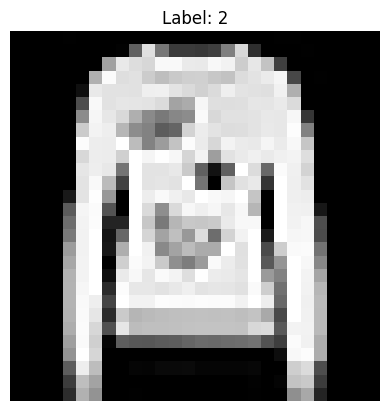

In [20]:
# show the sixth test image
plt.imshow(X_test[5000].reshape(28,28), cmap='gray')  # 28x28 pixel gray image
plt.title(f"Label: {y_test[5000]}")
plt.axis('off')
plt.show()

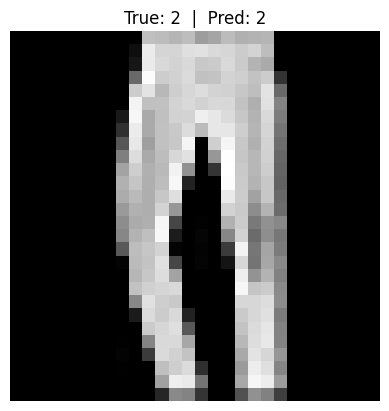

In [21]:
img = X_test[5000].reshape(1,28,28,1)   # reshape for model input
pred = model.predict(img, verbose=0).argmax()  # predicted label
    
plt.imshow(X_test[5].reshape(28,28), cmap='gray')
plt.title(f"True: {y_test[5000]}  |  Pred: {pred}")
plt.axis('off')
plt.show()

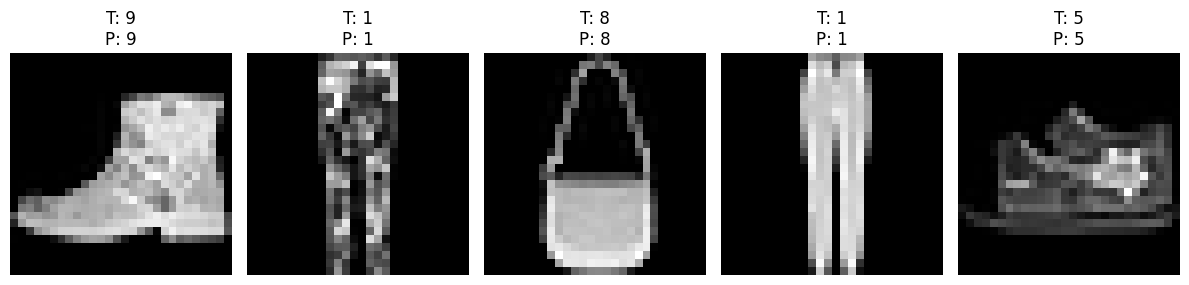

In [23]:
# Last 5 images + reshape for model (add channel dimension)
images = X_test[-5:].reshape(-1, 28, 28, 1)
labels = y_test[-5:]

# Predict all last 5 images
preds = model.predict(images, verbose=0).argmax(axis=1)

plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i].reshape(28, 28), cmap='gray')
    plt.title(f"T: {labels[i]}\nP: {preds[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()